# Predicting H1N1 and FLU Vaccines

### Importing Necessary Libraries

In [218]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_features = pd.read_csv('data/training_set_features.csv')
df_labels = pd.read_csv('data/training_set_labels.csv')

In [3]:
df_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
df_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [5]:
df_features.shape

(26707, 36)

In [6]:
df_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [7]:
df_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [8]:
df_labels.shape

(26707, 3)

In [9]:
df = df_features.set_index('respondent_id').join(df_labels.set_index('respondent_id'))
print(df.shape)
df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### Deal with missing values

In [10]:
df.isnull().sum() 

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### For numerical columns (features), we will fill the NaN with the median.

In [11]:
df.fillna(df.median(),inplace=True)

In [12]:
df.isnull().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### For categorical variables, we replace the missing values with the word 'unknown'.


In [13]:
df.replace(np.nan,'unknown',inplace=True)

In [14]:
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [15]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [16]:
'''
'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'education', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'
    
'''

"\n'behavioral_antiviral_meds', 'behavioral_avoidance',\n       'behavioral_face_mask', 'behavioral_wash_hands',\n       'behavioral_large_gatherings', 'behavioral_outside_home',\n       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',\n       'chronic_med_condition', 'child_under_6_months', 'health_worker',\n       'health_insurance', 'education', 'income_poverty', 'marital_status',\n       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',\n       'household_adults', 'household_children', 'employment_industry',\n       'employment_occupation'\n    \n"

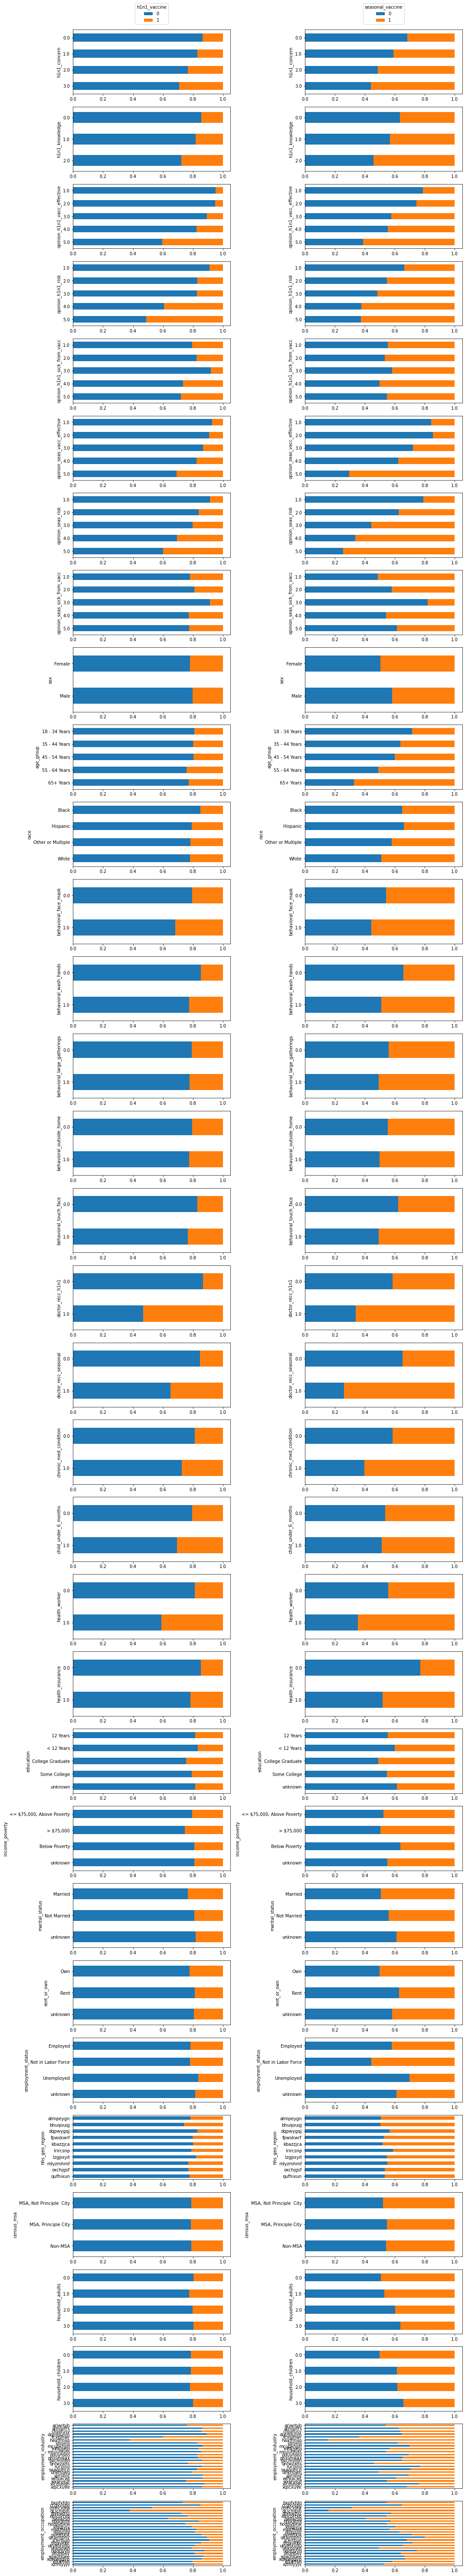

In [17]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'behavioral_face_mask', 
    'behavioral_wash_hands',
    'behavioral_large_gatherings', 
    'behavioral_outside_home',
    'behavioral_touch_face', 
    'doctor_recc_h1n1', 
    'doctor_recc_seasonal',
    'chronic_med_condition', 
    'child_under_6_months', 
    'health_worker',
    'health_insurance', 
    'education', 
    'income_poverty', 
    'marital_status',
    'rent_or_own', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa',
    'household_adults', 
    'household_children', 
    'employment_industry',
    'employment_occupation'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(15,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

<AxesSubplot:>

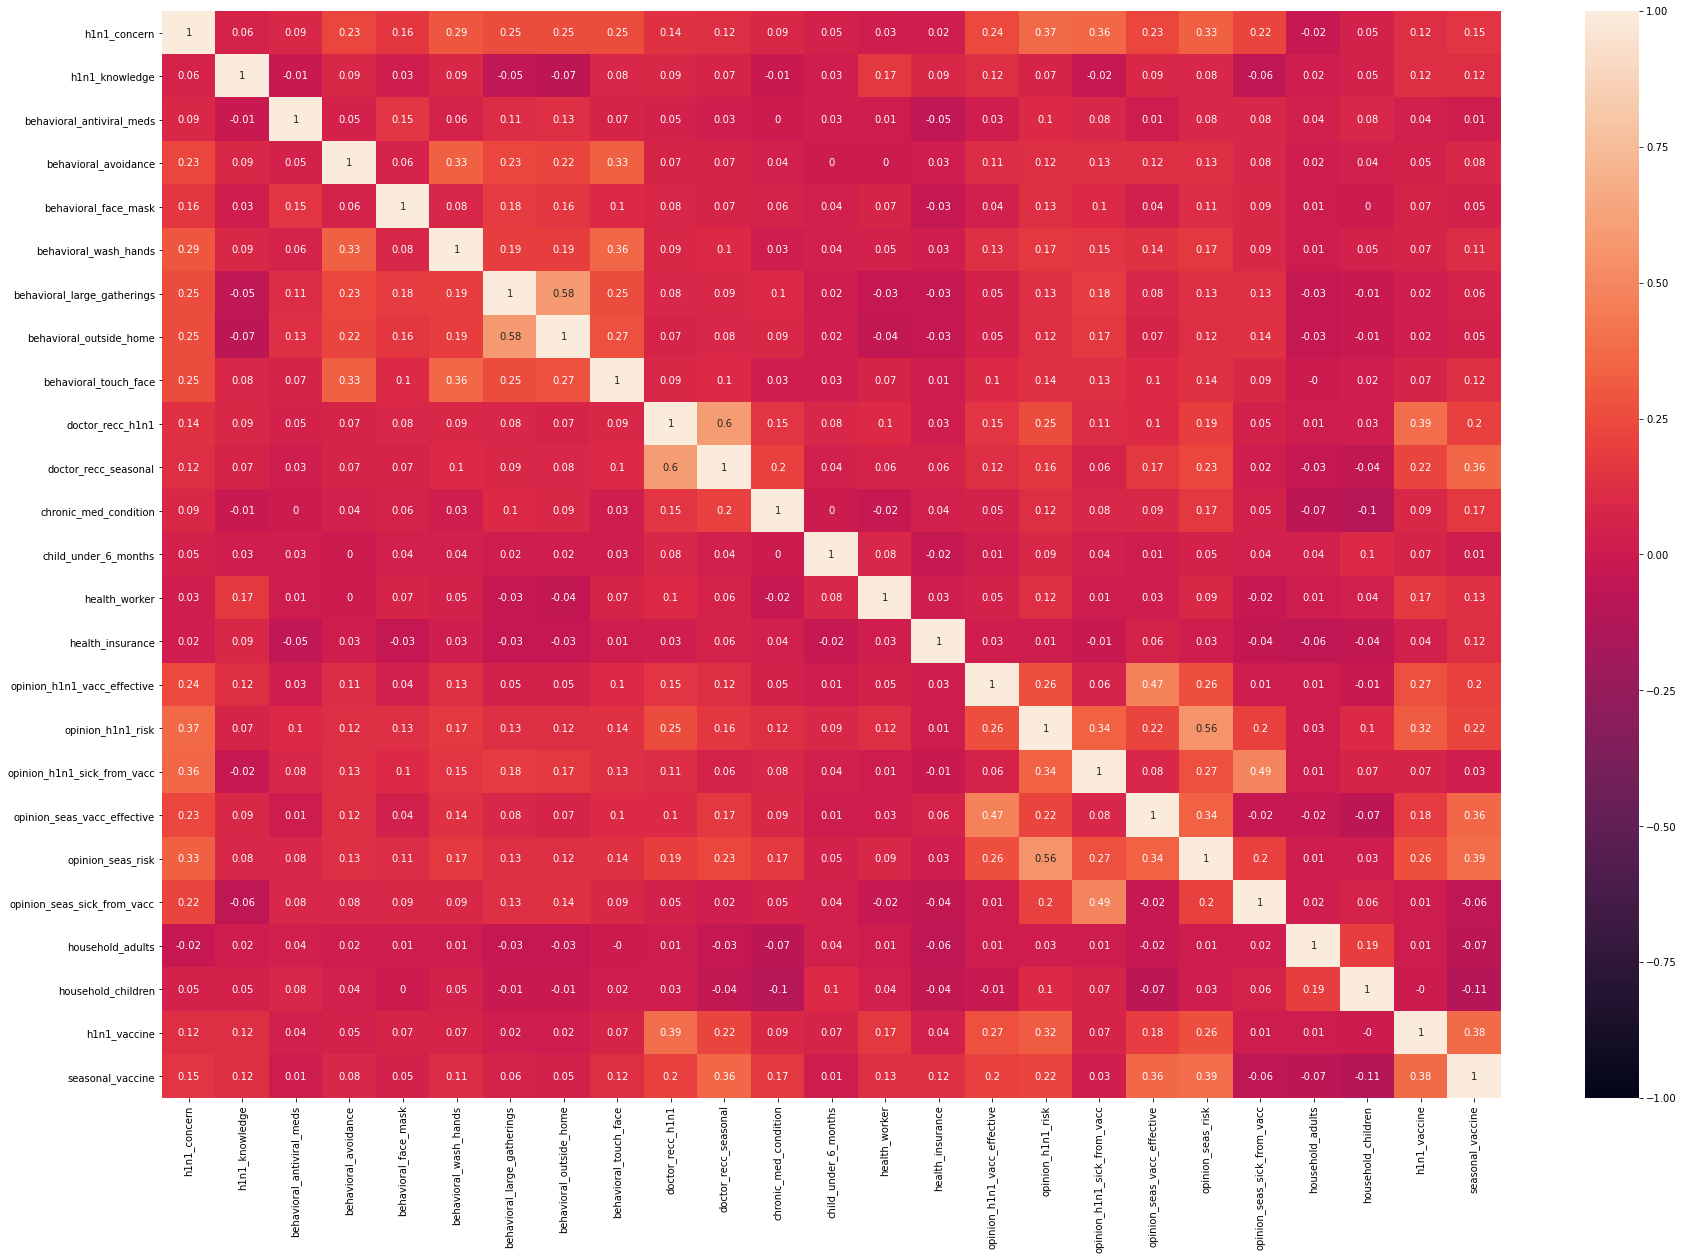

In [18]:
import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(df.corr().round(2),annot=True,vmin=-1,vmax=1)

In [19]:
(df=='unknown').sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [20]:
df_2 = df.drop(columns =['hhs_geo_region', 
                   'employment_industry', 
                   'employment_occupation', 
                   'household_adults',
                   'household_children',
                   'employment_status', 
                   'income_poverty',
                   'race', 
                   #'opinion_seas_sick_from_vacc', 
                   #'opinion_h1n1_sick_from_vacc',
                   #'behavioral_outside_home',
                   'behavioral_large_gatherings',
                   #'behavioral_avoidance',
                   #'behavioral_antiviral_meds',
                    'census_msa',
                    ])
                   
               

In [21]:
df_2

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,marital_status,rent_or_own,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,1.0,2.0,55 - 64 Years,< 12 Years,Female,Not Married,Own,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,4.0,2.0,4.0,35 - 44 Years,12 Years,Male,Not Married,Rent,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,2.0,18 - 34 Years,College Graduate,Male,Not Married,Own,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5.0,4.0,1.0,65+ Years,12 Years,Female,Not Married,Rent,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,1.0,4.0,45 - 54 Years,Some College,Female,Married,Own,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,2.0,2.0,65+ Years,Some College,Female,Not Married,Own,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,5.0,1.0,1.0,18 - 34 Years,College Graduate,Male,Not Married,Rent,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,5.0,4.0,2.0,55 - 64 Years,Some College,Female,Not Married,Own,0,1


In [22]:
df_2.dtypes


h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
sex                             object
marital_status                  object
rent_or_own                     object
h1n1_vaccine             

In [23]:
(df_2=='unknown').sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
sex                               0
marital_status                 1408
rent_or_own                    2042
h1n1_vaccine                      0
seasonal_vaccine                  0
dtype: int64

### Other option for categorical to numerical transformation: One hot encoding:


In [24]:
df_3=pd.get_dummies(df_2,drop_first=True)
df_3

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_unknown,sex_Male,marital_status_Not Married,marital_status_unknown,rent_or_own_Rent,rent_or_own_unknown
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,1,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,1,1,0,1,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


In [25]:
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Own", value = 0)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Rent", value = 1)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "unknown", value = 2)

# encoder=LabelEncoder()
# df_2['rent_or_own']=encoder.fit_transform(df_2['rent_or_own'])

In [26]:
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Not Married", value = 0)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Married", value = 1)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "unknown", value = 2)



# encoder=LabelEncoder()
# df_2['marital_status']=encoder.fit_transform(df_2['marital_status'])

In [27]:
df_2['sex'] = df_2['sex'].replace(to_replace = "Female", value = 0)
df_2['sex'] = df_2['sex'].replace(to_replace = "Male", value = 1)

# encoder=LabelEncoder()
# df_2['sex']=encoder.fit_transform(df_2['sex'])

In [28]:
df_2['education'] = df_2['education'].replace(to_replace = "< 12 Years", value = 0)
df_2['education'] = df_2['education'].replace(to_replace = "12 Years", value = 1)
df_2['education'] = df_2['education'].replace(to_replace = "Some College", value = 2)
df_2['education'] = df_2['education'].replace(to_replace = "College Graduate", value = 3)
df_2['education'] = df_2['education'].replace(to_replace = "unknown", value = 4)

# encoder=LabelEncoder()
# df_2['education']=encoder.fit_transform(df_2['education'])

In [29]:
df_2['age_group'] = df_2['age_group'].replace(to_replace = "18 - 34 Years", value = 0)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "35 - 44 Years", value = 1)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "45 - 54 Years", value = 2)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "55 - 64 Years", value = 3)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "65+ Years", value = 4)

# encoder=LabelEncoder()
# df_2['age_group']=encoder.fit_transform(df_2['age_group'])

In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_outside_home      26707 non-null  float64
 7   behavioral_touch_face        26707 non-null  float64
 8   doctor_recc_h1n1             26707 non-null  float64
 9   doctor_recc_seasonal         26707 non-null  float64
 10  chronic_med_condition        26707 non-null  float64
 11  child_under_6_months         26707 non-null  float64
 12  health_worker                26707 non-null  float64
 13  health_insurance

## Train Model - H1N1 

In [210]:
## Train model
X = df_2.drop("h1n1_vaccine", axis=1)
y = df_2["h1n1_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Decision Tree - H1N1

In [211]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=42)

In [212]:
y_test_pred=tree_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7754979781338924


In [213]:
y_score=tree_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.6749465427493151


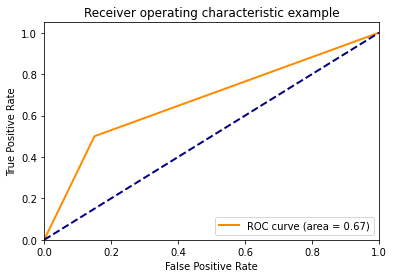

In [214]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [215]:
## Cross validation on the whole dataset, take advantage of the whole dataset
tree_model = DecisionTreeClassifier(random_state=42)
tree_log_loss = cross_val_score(tree_model, X, y, scoring="accuracy",cv=5)
tree_log_loss

array([0.78416323, 0.77592662, 0.78374836, 0.78393559, 0.7809399 ])

In [216]:
print('Cross Validation accuracy',tree_log_loss.mean())

Cross Validation accuracy 0.781742741439656


## Random Forest - H1N1

In [38]:
## Train model
rf_model = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [39]:
y_test_pred=rf_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8526284259397933


In [40]:
y_score=rf_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8713165293813167


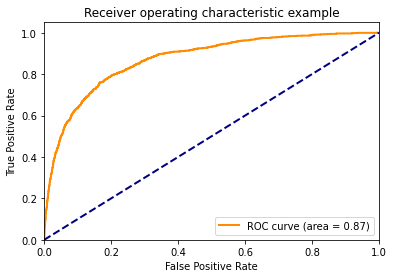

In [41]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## ADA Boost  - H1N1

In [42]:
## Train model
ab_model = AdaBoostClassifier()
ab_model.fit(X_train,y_train)

AdaBoostClassifier()

In [43]:
y_test_pred=ab_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.851879586640707


In [44]:
y_score=ab_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8679611269220017


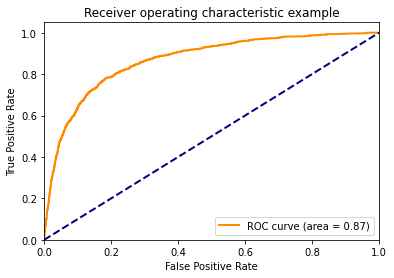

In [45]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Gradient Boost  - H1N1

### GB Model 1 - H1N1

In [46]:
## Train model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [47]:
y_test_pred=gb_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8586191403324847


In [48]:
y_score=gb_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8740136510665583


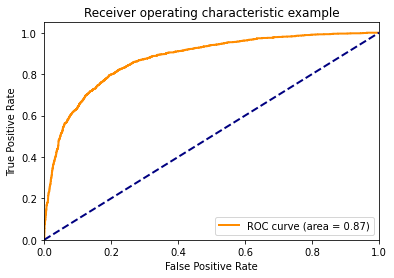

In [49]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 2  - H1N1

In [50]:
gb_2_model = GradientBoostingClassifier(n_estimators=50, max_depth = 5)
gb_2_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [51]:
y_test_pred=gb_2_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8545754081174181


In [52]:
y_score=gb_2_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8749174049624305


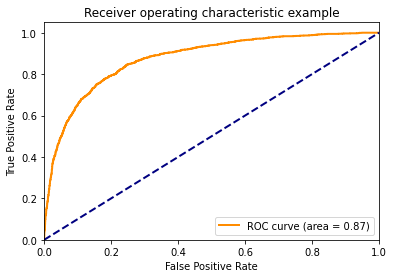

In [57]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 3 - H1N1

In [82]:
gb_3_model = GradientBoostingClassifier(n_estimators=75, max_depth = 5)
gb_3_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=75)

In [83]:
y_test_pred=gb_3_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8551744795566871


In [84]:
y_score=gb_3_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8752030196075593


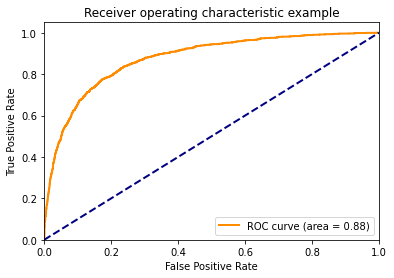

In [85]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 4 - H1N1

In [132]:
gb_4_model = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8 )
gb_4_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=8, n_estimators=75)

In [133]:
y_test_pred=gb_4_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8547251759772353


In [134]:
y_score=gb_4_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8753729006787468


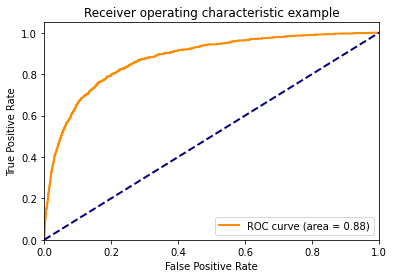

In [135]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 5 - H1N1

In [166]:
gb_5_model = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8, 
                                        min_samples_leaf=2, verbose = 3)
gb_5_model.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9682            3.23s
         2           0.9193            3.16s
         3           0.8808            2.95s
         4           0.8496            2.81s
         5           0.8241            2.80s
         6           0.8028            2.85s
         7           0.7846            2.79s
         8           0.7694            2.72s
         9           0.7560            2.66s
        10           0.7448            2.60s
        11           0.7348            2.53s
        12           0.7264            2.47s
        13           0.7188            2.41s
        14           0.7121            2.36s
        15           0.7064            2.32s
        16           0.7011            2.26s
        17           0.6966            2.20s
        18           0.6923            2.14s
        19           0.6888            2.09s
        20           0.6850            2.06s
        21           0.6821            2.02s
        2

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=8,
                           n_estimators=75, verbose=3)

In [167]:
y_test_pred=gb_5_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8541261045379661


In [168]:
y_score=gb_5_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8743993179559802


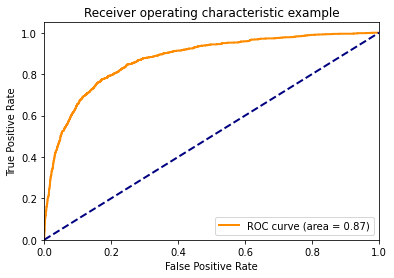

In [169]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Voting Classifier  - H1N1

In [170]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=1)
clf3 = AdaBoostClassifier()

In [54]:
eclf1 = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ('ab', clf3)], voting='hard')

In [55]:
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=1)),
                             ('ab', AdaBoostClassifier())])

In [56]:
y_test_pred=eclf1.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8569716938744946


## Train Model - Seasonal 

In [171]:
## Train model
X = df_2.drop("seasonal_vaccine", axis=1)
y = df_2["seasonal_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Decision Tree - Seasonal 

In [172]:
tree_model_seasonal = DecisionTreeClassifier(random_state=42)
tree_model_seasonal.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=42)

In [173]:
y_test_pred=tree_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7100494233937397


In [174]:
y_score=tree_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.7087071456079342


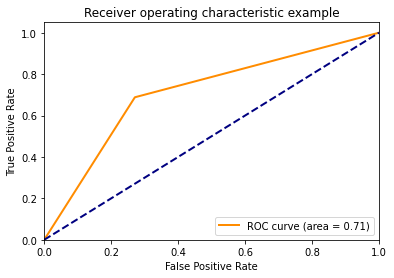

In [175]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [176]:
## Cross validation on the whole dataset, take advantage of the whole dataset
tree_model_seasonal = DecisionTreeClassifier(random_state=42)
tree_log_loss = cross_val_score(tree_model, X, y, scoring="accuracy",cv=5)
tree_log_loss

array([0.70872332, 0.71153126, 0.71147725, 0.71503464, 0.70866879])

In [177]:
print('Cross Validation accuracy',tree_log_loss.mean())

Cross Validation accuracy 0.711087052814593


## Random Forest - Seasonal 

In [178]:
## Train model
rf_model_seasonal = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)
rf_model_seasonal.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [179]:
y_test_pred=rf_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7976636213868504


In [180]:
y_score=rf_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8746980504307617


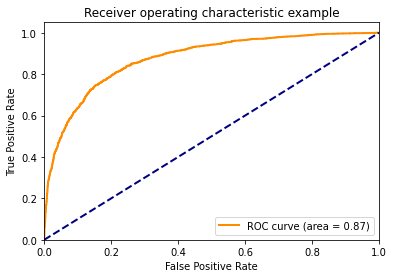

In [181]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## ADA Boost - Seasonal 

In [182]:
## Train model
ab_model_seasonal = AdaBoostClassifier()
ab_model_seasonal.fit(X_train,y_train)

AdaBoostClassifier()

In [183]:
y_test_pred=ab_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7955668713494084


In [184]:
y_score=ab_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8724783898042282


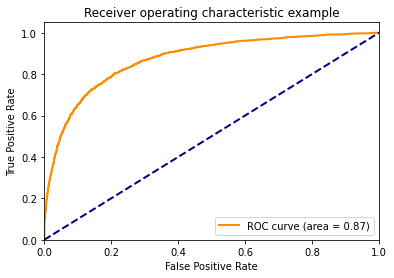

In [185]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Gradient Boost - Seasonal 

### GB Model 1 - Seasonal 

In [186]:
## Train model
gb_model_seasonal = GradientBoostingClassifier()
gb_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier()

In [187]:
y_test_pred=gb_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8051520143777146


In [188]:
y_score=gb_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8789769539323848


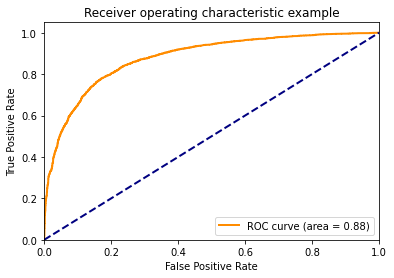

In [189]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 2 - Seasonal 

In [190]:
gb_2_model_seasonal = GradientBoostingClassifier(n_estimators=50, max_depth = 5)
gb_2_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [191]:
y_test_pred=gb_2_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8029054964804553


In [192]:
y_score=gb_2_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8784458490250351


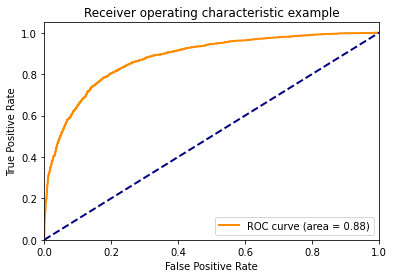

In [193]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 3 - Seasonal 

In [194]:
gb_3_model_seasonal = GradientBoostingClassifier(n_estimators=75, max_depth = 5)
gb_3_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=75)

In [195]:
y_test_pred=gb_3_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8060506215366182


In [196]:
y_score=gb_3_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8794216072389289


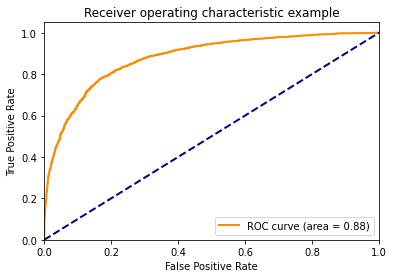

In [197]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 4 - Seasonal 

In [198]:
gb_4_model_seasonal = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8 )
gb_4_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=8, n_estimators=75)

In [199]:
y_test_pred=gb_4_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8054515500973491


In [200]:
y_score=gb_4_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.879851386182456


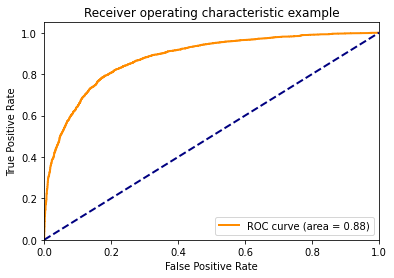

In [201]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### GB Model 5 - Seasonal 

In [202]:
gb_5_model_seasonal = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8, 
                                        min_samples_leaf=2, verbose = 3)
gb_5_model_seasonal.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3074            3.40s
         2           1.2467            3.58s
         3           1.1965            3.22s
         4           1.1542            3.01s
         5           1.1183            2.85s
         6           1.0878            2.79s
         7           1.0614            2.70s
         8           1.0390            2.59s
         9           1.0195            2.50s
        10           1.0019            2.41s
        11           0.9864            2.33s
        12           0.9728            2.29s
        13           0.9608            2.25s
        14           0.9501            2.19s
        15           0.9402            2.13s
        16           0.9317            2.07s
        17           0.9240            2.02s
        18           0.9167            1.97s
        19           0.9101            1.93s
        20           0.9037            1.90s
        21           0.8981            1.86s
        2

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=8,
                           n_estimators=75, verbose=3)

In [203]:
y_test_pred=gb_5_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8041036393589935


In [204]:
y_score=gb_5_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8800550297343023


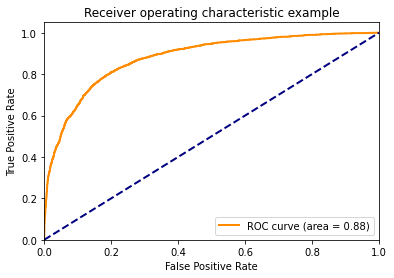

In [205]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Voting Classifier - Seasonal 

In [206]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=1)
clf3 = AdaBoostClassifier()

In [207]:
eclf1 = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ('ab', clf3)], voting='hard')

In [208]:
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=1)),
                             ('ab', AdaBoostClassifier())])

In [209]:
y_test_pred=eclf1.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8029054964804553
